In [39]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [40]:
lead_df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Inspecting the Dataframe

In [41]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [42]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [43]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

lead_df = lead_df.replace('Select', np.nan)

In [44]:
# Missing Data Percentage
x=lead_df.isnull().mean()*100
x.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [45]:
# create list of columns having unique values 1
list1=list(lead_df.columns[lead_df.nunique()==1])

In [46]:
# create list of columns having unique values 2
list2=list(lead_df.columns[lead_df.nunique()==2])

In [47]:
list2.remove("Converted")

In [48]:
# Encoding the variables with yes/no labels
for feature in list2:

    lead_df[feature] = lead_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,No,0,0,0,0,0,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,No,0,0,0,0,0,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,No,0,0,0,0,0,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,No,0,0,0,0,0,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,No,0,0,0,0,0,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,0,Modified


In [49]:
for i in list2:
    print(i)
    print("---------------------------------------------------------------------------------")
    print(lead_df[i].value_counts(normalize=True)*100)
    print("----------------------------------------------------------------------------------")

Do Not Email
---------------------------------------------------------------------------------
0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64
----------------------------------------------------------------------------------
Do Not Call
---------------------------------------------------------------------------------
0    99.978355
1     0.021645
Name: Do Not Call, dtype: float64
----------------------------------------------------------------------------------
Search
---------------------------------------------------------------------------------
0    99.848485
1     0.151515
Name: Search, dtype: float64
----------------------------------------------------------------------------------
Newspaper Article
---------------------------------------------------------------------------------
0    99.978355
1     0.021645
Name: Newspaper Article, dtype: float64
----------------------------------------------------------------------------------
X Education Forums
-------------

In [50]:
# Dropping columns having more than 40% null values
lead_df.drop(lead_df.columns[100*lead_df.isnull().mean()>40],axis=1,inplace=True)

In [51]:
# Dropping columns having only one unique values
lead_df.drop(list1,axis=1,inplace=True)

In [52]:
lead_df.drop('Prospect ID',axis=1,inplace=True)

In [53]:
# chekcing shape after dropping unwanted columns
lead_df.shape

(9240, 24)

In [54]:
100*lead_df.isnull().mean().sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Number                                       0.000000
Newspaper Article                                 0.0000

In [55]:
# check data types of columns
lead_df.dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                       int64
Do Not Call                                        int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                             int64
Newspaper Article                                  int64
X Education Forums                                 int64
Newspaper                      

In [56]:
categorical_list=list(lead_df.columns[(lead_df.dtypes==object) | (lead_df.nunique()<=3)])
categorical_list

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [57]:
continous_list=list(lead_df.columns[(lead_df.dtypes!=object) & (lead_df.nunique()>2)])
continous_list

['Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [58]:
# remove "Covterted" column from categorical list 
categorical_list.remove("Converted")

In [59]:
for i in categorical_list :
    if 100*lead_df[i].isnull().mean() > 2 :
        mode=lead_df[i].mode()[0]
        lead_df[i]=lead_df[i].fillna(mode)

In [60]:
for i in continous_list :
    if 100* lead_df[i].isnull().mean() > 2 :
        med=lead_df[i].median()
        lead_df[i]=lead_df[i].fillna(med)

In [61]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)

In [62]:
# chekcing missing values after imputation
lead_df.isnull().mean()*100

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

# Step 4: Exploratory Data Analysis

In [63]:
# Lets start with the target variable and see if we have any data imbalance or not 
lead_df["Converted"].value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

- We have good representation of both the classes of data and hence we are good to go with the further analysis

In [64]:
def boxplot(columns) :
    sns.boxplot(lead_df[columns])


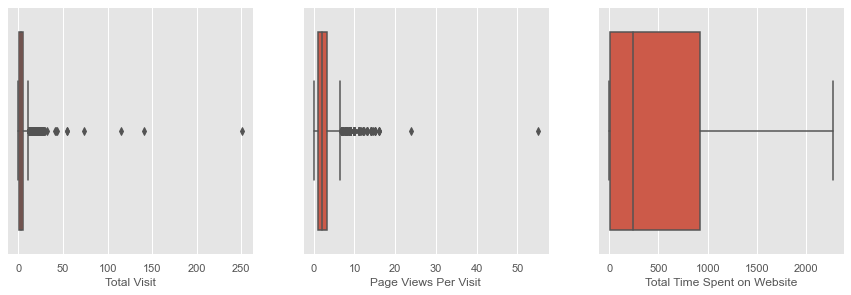

In [65]:
# Finding the outliers
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
boxplot('TotalVisits')
plt.xlabel('Total Visit')
plt.subplot(2,3,2)
boxplot('Page Views Per Visit')
plt.xlabel("Page Views Per Visit")
plt.subplot(2,3,3)
boxplot('Total Time Spent on Website')
plt.xlabel('Total Time Spent on Website')
plt.show()

In [66]:
continous_list

['Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

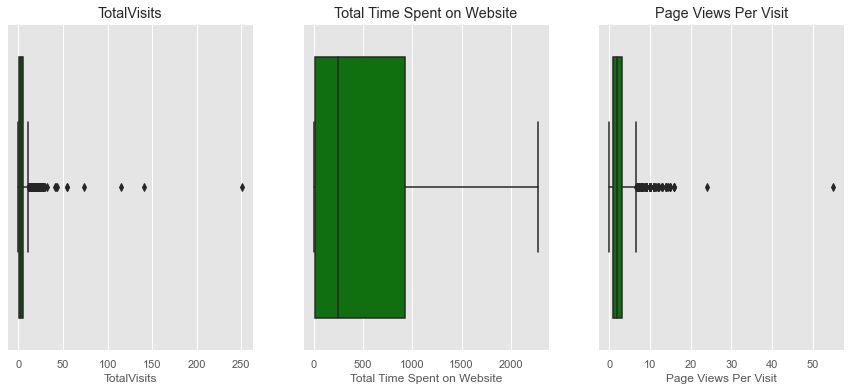

In [67]:
plt.figure(figsize=(15,6))
# sns.set()
# plt.subplots_adjust(wspace=0.1,hspace=0.2)
for i in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(lead_df[i[1]],palette=['green'])
    plt.title(i[1])

- There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

In [68]:
q1 = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= q1] = q1
q2 = lead_df['Page Views Per Visit'].quantile(0.85)
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= q2] = q2

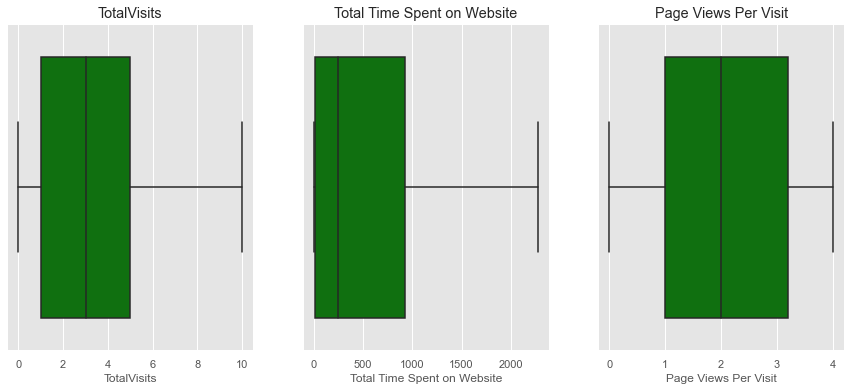

In [69]:
plt.figure(figsize=(15,6))
# sns.set()
# plt.subplots_adjust(wspace=0.1,hspace=0.2)
for i in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(lead_df[i[1]],palette=['green'])
    plt.title(i[1])

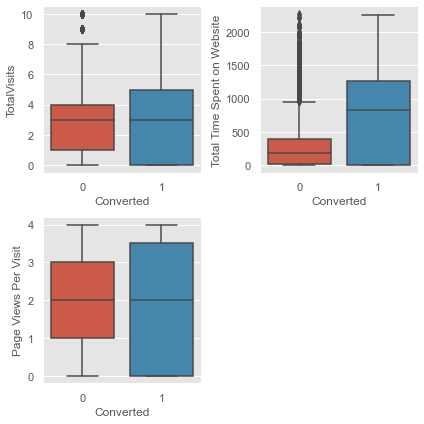

In [70]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website",'Page Views Per Visit']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead_df)
    plt.tight_layout()

Insights:

- The median of both the conversion and non-conversion are same for "TotalVisits" and 'Page Views Per Visit' and hence nothing conclusive can be said using this information

- Users spending more time on the website are more likely to get converted

In [71]:
len(categorical_list)

19

In [72]:
# create categorical list with number values in columns is greater than 3
categorical_greater3=list(lead_df[categorical_list].columns[lead_df[categorical_list].nunique() > 3])


# create categorical list with number values in columns is less than 3
categorical_less3=list(lead_df[categorical_list].columns[lead_df[categorical_list].nunique() <= 3])

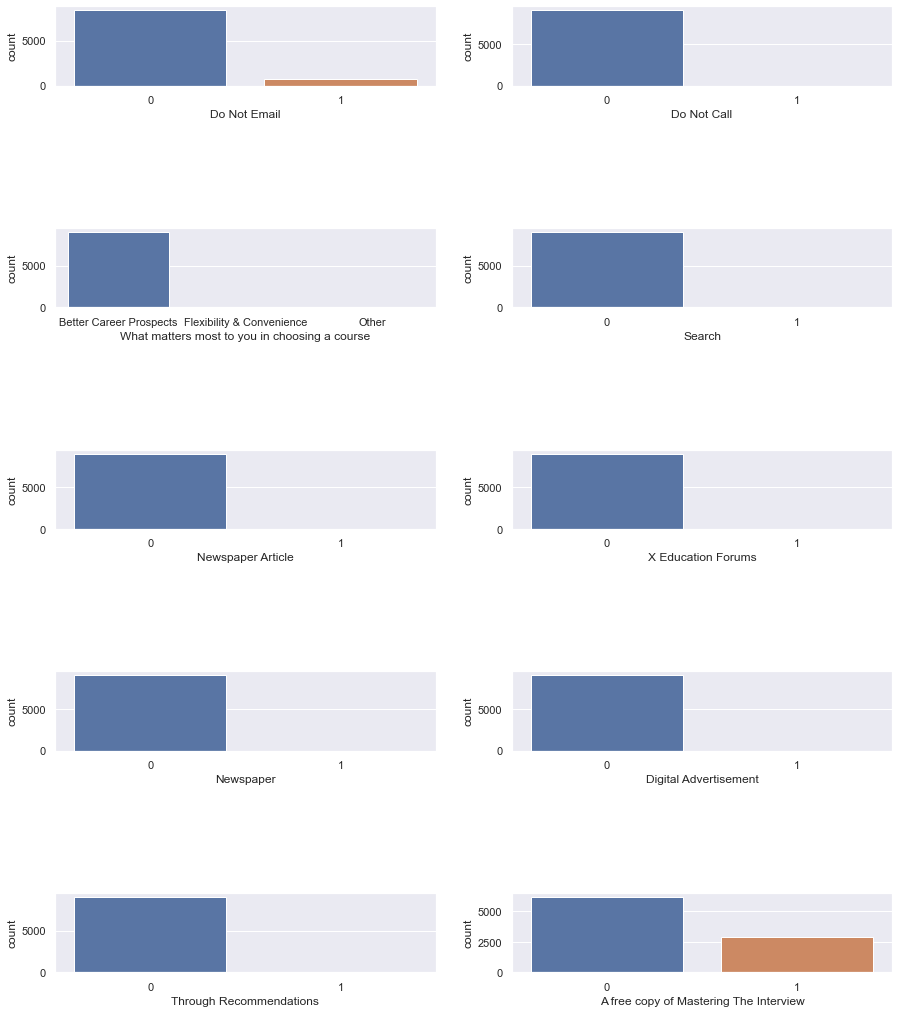

In [73]:
plt.figure(figsize=(15,30))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.8 )
for i in enumerate(categorical_less3) :
    plt.subplot(8,2,i[0]+1)
    sns.countplot(data=lead_df , x=i[1])
#     plt.xticks(rotation=90)

Insight

- almost all columns are highly skewed except "A free of Mastering The interview "


In [74]:
categorical_less3

['Do Not Email',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [75]:
# Converting all low count categories to Others category
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [76]:
# Converting all the low count categories to the 'Others' category
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront','Unreachable',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')


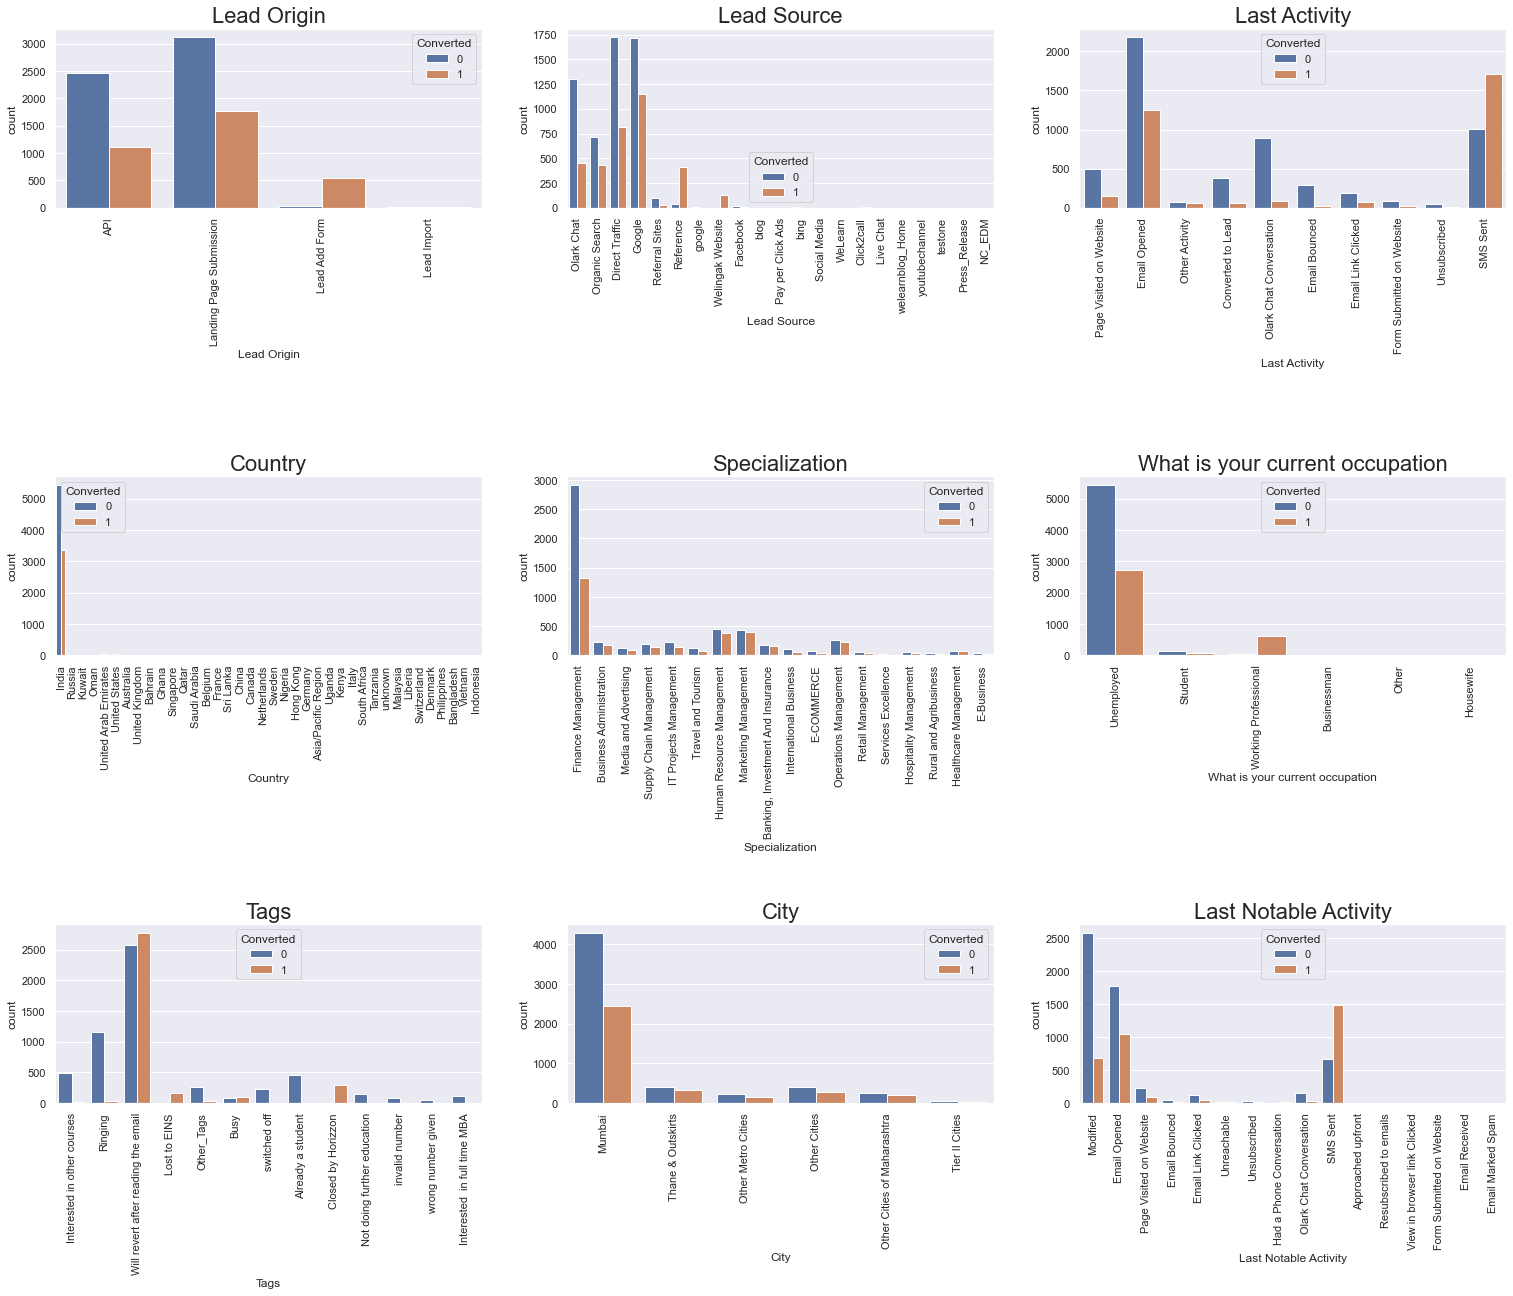

In [77]:
plt.figure(figsize=(26,28))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.5 )
for i in enumerate(categorical_greater3) :
    plt.subplot(4,3,i[0]+1)
    sns.countplot(data =lead_df,hue="Converted" ,x=i[1])
    plt.xticks(rotation=90)
    plt.title(i[1],fontsize=22)
plt.show()

OBSERVATION:

- 'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

:* SUMMARY:

- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'

- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

- Websites can be made more appealing so as to increase the time of the Users on websites

- We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

- To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

- We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [78]:
# Dropping unnecessary columns

lead_df = lead_df.drop(['What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Country','Do Not Call'],1)

lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Activity,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,Modified


In [79]:
len(lead_df.columns)

14

In [80]:
lead_df.shape

(9074, 14)

# Step 5: Dummy Variable Creation

In [81]:
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [82]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'], axis=1)
lead_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0,0.0,0,0.0
1,660728,0,0,5.0,674,2.5
2,660727,0,1,2.0,1532,2.0
3,660719,0,0,1.0,305,1.0
4,660681,0,1,2.0,1428,1.0


In [83]:
lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Step 6: Test-Train Split

In [84]:
# Putting feature variable to X
X = lead_df.drop(['Lead Number','Converted'], axis=1)
# Putting response variable to y
y = lead_df['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 7: Feature Scaling

In [86]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.050754,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.050754,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.412404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.050754,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.289659,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


In [88]:
lead_df.shape

(9074, 92)

In [89]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = lead_df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(20)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.752344
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Page Views Per Visit                   Lead Origin_Landing Page Submission              0.603648
Lead Origin_Landing Page Submi

In [90]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

In [91]:
conv_corr = X_train.corr()

In [92]:
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form              Lead Source_Reference                            0.859537
TotalVisits                            Page Views Per Visit                             0.754942
Do Not Email                           Last Activity_Email Bounced                      0.624939
Page Views Per Visit                   Lead Origin_Landing Page Submission              0.600200
Lead Origin_Landing Page Submission    Lead Source_Direct Traffic                       0.516152
Lead Origin_Lead Add Form              Lead Source_Welingak Website                     0.468225
Last Activity_Email Bounced            Last Notable Activity_Email Bounced              0.450911
TotalVisits                            Lead Origin_Landing Page Submission              0.447765
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation            0.419173
Last Activity_Olark Chat Conversation  Last Notable Activity_Olark Chat Conversation    0.406150
dtype: float64

# Step 9: Model Building

In [93]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           82
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Jun 2023   Deviance:                       97261.
Time:                        07:50:22   Pearson chi2:                 4.76e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -8.669e+14   5.39e+07  -1.61e+07      0.000   -8.67e+14   -8.67e+14
Do Not Email                                          -4.13e+14   4.44e+06   -9.3e+07      0.000   -4.13e+14   -4.13e+14
TotalVisits                                           5.019e+13   1.37e+06   3.66e+07      0.000    5.02e+13    5.02e+13
Total Time Spent on Website                           5.649e+14   1.01e+06    5.6e+08      0.000    5.65e+14    5.65e+14
Page Views Per Visit                                 -9.047e+13   1.75e+06  -5.17e+07      0.000   -9.05e+13   -9.05e+13
Lead Origin_Landing Page Submission                  -1.158e+14   2.89e+06     -4e+07      0.000   -1.16e+14   -1.16e+14
Lead Origin_Lead Add Form                             1.244e+15   4.07e+07   3.06e+07      0.000    1.24e+15    1.24e+15
Lead Origin_Lead Import                               1.558e+15   4.76e+07   3.28e+07      0.000    1.56e+15    1.56e+15
Lead Source_Direct Traffic                            8.172e+14   4.56e+07   1.79e+07      0.000    8.17e+14    8.17e+14
Lead Source_Google                                     8.49e+14   4.56e+07   1.86e+07      0.000    8.49e+14    8.49e+14
Lead Source_Live Chat                                 4.626e+15   5.91e+07   7.83e+07      0.000    4.63e+15    4.63e+15
Lead Source_NC_EDM                                    5.771e+15   8.12e+07   7.11e+07      0.000    5.77e+15    5.77e+15
Lead Source_Olark Chat                                1.249e+15   4.55e+07   2.74e+07      0.000    1.25e+15    1.25e+15
Lead Source_Organic Search                            9.012e+14   4.56e+07   1.98e+07      0.000    9.01e+14    9.01e+14
Lead Source_Pay per Click Ads                         3.013e+15   8.13e+07   3.71e+07      0.000    3.01e+15    3.01e+15
Lead Source_Press_Release                             1.695e+15   8.16e+07   2.08e+07      0.000    1.69e+15    1.69e+15
Lead Source_Reference                                 9.736e+14   3.54e+07   2.75e+07      0.000    9.74e+14    9.74e+14
Lead Source_Referral Sites                            1.009e+15   4.62e+07   2.19e+07      0.000    1.01e+15    1.01e+15
Lead Source_Social Media                              1.867e+15    6.6e+07   2.83e+07      0.000    1.87e+15    1.87e+15
Lead Source_WeLearn                                     28.3948   5.63e-07   5.04e+07      0.000      28.395      28.395
Lead Source_Welingak Website                          1.428e+15   3.58e+07   3.98e+07      0.000    1.43e+15    1.43e+15
Lead Source_bing                                      2.137e+15   5.99e+07   3.57e+07      0.000    2.14e+15    2.14e+15
Lead Source_blog                                     -2.49

# Step 10: Feature Selection Using RFE

In [94]:
# Starting with 15 features selected by RFE
# We will then optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 56),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 52),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 59),
 ('Lead Source_NC_EDM', False, 41),
 ('Lead Source_Olark Chat', False, 36),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 68),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', False, 29),
 ('Lead Source_WeLearn', False, 69),
 ('Lead Source_Welingak Website', False, 3),
 ('Lead Source_bing', False, 62),
 ('Lead Source_blog', False, 17),
 ('Lead Source_google', False, 12),
 ('Lead Source_testone', False, 66),
 ('Lead Source_welearnblog_Home', False, 21),
 ('Lea

In [95]:
# columns supported by RFE
col = X_train.columns[rfe.support_]

#### Assessing the model with StatsModels

In [96]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(cols)
    log = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res=log.fit()
    print(res.summary())
    return res

In [97]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = cols
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [98]:
build_model(X_train[col])
get_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.2
Date:                Tue, 06 Jun 2023   Deviance:                       4002.4
Time:                        07:50:27   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5048
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [99]:

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.2
Date:                Tue, 06 Jun 2023   Deviance:                       4002.4
Time:                        07:50:27   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8213      0.291     -6.262      0.000      -2.391      -1.251
Do Not Email                                            -1.5808      0.204     -7.734      0.000      -1.981      -1.180
Lead Origin_Lead Add Form                                2.4435      0.258      9.487      0.000       1.939       2.948
Last Activity_SMS Sent                                   1.9704      0.091     21.541      0.000       1.791       2.150
Last Activity_Unsubscribed                               2.1042      0.552      3.811      0.000       1.022       3.186
What is your current occupation_Unemployed              -1.6547      0.282     -5.868      0.000      -2.207      -1.102
What is your current occupation_Working Professional     1.2812      0.354      3.619      0.000       0.587       1.975
Tags_Busy                                                2.7702      0.292      9.474      0.000       2.197       3.343
Tags_Closed by Horizzon                                  8.7246      0.746     11.697      0.000       7.263      10.187
Tags_Lost to EINS                                        8.5366      0.754     11.316      0.000       7.058      10.015
Tags_Ringing                                            -1.4561      0.314     -4.643      0.000      -2.071      -0.841
Tags_Will revert after reading the email                 3.3039      0.201     16.466      0.000       2.911       3.697
Tags_invalid number                                    -21.7302   1.47e+04     -0.001      0.999   -2.89e+04    2.88e+04
Tags_switched off                                       -1.1878      0.553     -2.148      0.032      -2.271      -0.104
Last Notable Activity_Modified                          -1.7436      0.093    -18.819      0.000      -1.925      -1.562
Last Notable Activity_Olark Chat Conversation           -1.6867      0.315     -5.360      0.000      -2.304      -1.070
========================================================================================================================
"""

In [100]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.457078
1012    0.765493
9226    0.008966
4750    0.857942
7987    0.994970
1281    0.857942
2880    0.457078
4971    0.779812
7536    0.457078
1248    0.008966
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45707836, 0.76549326, 0.00896607, 0.85794188, 0.99497045,
       0.85794188, 0.45707836, 0.77981165, 0.45707836, 0.00896607])

In [102]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.457078,3009
1,0,0.765493,1012
2,0,0.008966,9226
3,1,0.857942,4750
4,1,0.994970,7987


In [103]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.457078,3009,0
1,0,0.765493,1012,1
2,0,0.008966,9226,0
3,1,0.857942,4750,1
4,1,0.994970,7987,1


In [104]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8499448905684144


In [105]:
col = col.drop('Tags_invalid number')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### model2

In [106]:
build_model(X_train[col])
get_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2005.2
Date:                Tue, 06 Jun 2023   Deviance:                       4010.4
Time:                        07:50:27   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5042
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [107]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8499448905684144


In [108]:
col = col.drop('Tags_switched off')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### model3

In [109]:
build_model(X_train[col])
get_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2007.4
Date:                Tue, 06 Jun 2023   Deviance:                       4014.8
Time:                        07:50:27   Pearson chi2:                 9.98e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5039
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [110]:
col = col.drop('What is your current occupation_Unemployed')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### model4

In [111]:
build_model(X_train[col])
get_vif(X_train[col])

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.8
Date:                Tue, 06 Jun 2023   Deviance:                       4053.5
Time:                        07:50:27   Pearson chi2:                 9.40e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5008
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [112]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.8499448905684144


In [113]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [114]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3647  258]
 [ 695 1751]]
Accuracy : 0.8499448905684144
Sensitivity : 0.7158626328699919
Specificity : 0.9339308578745198
Precision : 0.8715778994524639


(0.8499448905684144,
 0.7158626328699919,
 0.9339308578745198,
 0.8715778994524639)

# Step 11: Plotting the ROC Curve

An ROC curve

- shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
- The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.


Here, our goal is to have achieve good sensitivity score

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

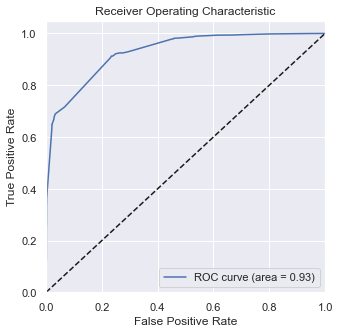

In [117]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

# Step 12: Finding optimal value of the cut off

In [118]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.457078,3009,0,1,1,1,1,1,0,0,0,0,0
1,0,0.765493,1012,1,1,1,1,1,1,1,1,1,0,0
2,0,0.008966,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.857942,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.994970,7987,1,1,1,1,1,1,1,1,1,1,1


In [119]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.712801,0.979150,0.545967,0.574616
0.2,0.2,0.817824,0.917007,0.755698,0.701595
0.3,0.3,0.818139,0.917007,0.756210,0.702034
0.4,0.4,0.822390,0.910057,0.767478,0.710274
0.5,0.5,0.849945,0.715863,0.933931,0.871578
0.6,0.6,0.858290,0.678659,0.970807,0.935738
0.7,0.7,0.857660,0.676615,0.971063,0.936086
0.8,0.8,0.851362,0.647997,0.978745,0.950240
0.9,0.9,0.756889,0.372445,0.997695,0.990217


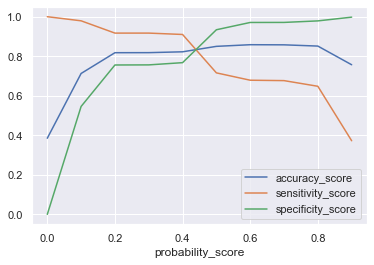

In [120]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

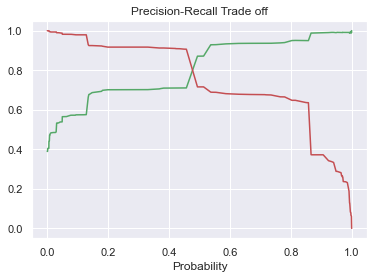

In [121]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

Comment:

- In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal. In Precision-Recall Curve 0.3 looks optimal.

- We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [122]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.457078,3009,1,46
1,0,0.765493,1012,1,77
2,0,0.008966,9226,0,1
3,1,0.857942,4750,1,86
4,1,0.994970,7987,1,99


In [123]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[2953  952]
 [ 203 2243]]
Accuracy : 0.8181388757675957
Sensitivity : 0.9170073589533932
Specificity : 0.7562099871959027
Precision : 0.7020344287949922


(0.8181388757675957,
 0.9170073589533932,
 0.7562099871959027,
 0.7020344287949922)

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.8
Date:                Tue, 06 Jun 2023   Deviance:                       4053.5
Time:                        07:50:29   Pearson chi2:                 9.40e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5008
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6165      0.182    -19.891      0.000      -3.973      -3.260
Do Not Email                                            -1.5648      0.203     -7.702      0.000      -1.963      -1.167
Lead Origin_Lead Add Form                                2.4860      0.256      9.697      0.000       1.983       2.988
Last Activity_SMS Sent                                   1.9049      0.090     21.277      0.000       1.729       2.080
Last Activity_Unsubscribed                               2.0214      0.546      3.704      0.000       0.952       3.091
What is your current occupation_Working Professional     2.9330      0.238     12.341      0.000       2.467       3.399
Tags_Busy                                                2.9578      0.275     10.759      0.000       2.419       3.497
Tags_Closed by Horizzon                                  8.8703      0.741     11.965      0.000       7.417      10.323
Tags_Lost to EINS                                        8.6801      0.749     11.583      0.000       7.211      10.149
Tags_Ringing                                            -1.2686      0.298     -4.252      0.000      -1.853      -0.684
Tags_Will revert after reading the email                 3.4863      0.181     19.241      0.000       3.131       3.841
Last Notable Activity_Modified                          -1.7298      0.092    -18.805      0.000      -1.910      -1.550
Last Notable Activity_Olark Chat Conversation           -1.6854      0.314     -5.373      0.000      -2.300      -1.071
========================================================================================================================
"""

In [125]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Lead Number'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Lead Number,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.467499,1,47
1,1,1490,0.942827,1,94
2,0,7936,0.467499,1,47
3,1,4216,0.997552,1,100
4,0,3830,0.467499,1,47


In [126]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1290  444]
 [  94  895]]
Accuracy : 0.8024237972824091
Sensitivity : 0.9049544994944388
Specificity : 0.7439446366782007
Precision : 0.6684092606422704


(0.8024237972824091,
 0.9049544994944388,
 0.7439446366782007,
 0.6684092606422704)

# Step 12 : Final Model

In [127]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [128]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.467499                  1          47
1         1012          0             0.775207                  1          78
2         9226          0             0.008924                  0           1
3         4750          1             0.855040                  1          86
4         7987          1             0.994720                  1          99
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.467499                  1          47
1         1490          1             0.942827                  1          94
2         7936          0             0.467499                  1          47
3         4216          1             0.997552                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.467499,1,47
1,1490,1,0.942827,1,94
2,7936,0,0.467499,1,47
3,4216,1,0.997552,1,100
4,3830,0,0.467499,1,47
...,...,...,...,...,...
2718,850,0,0.134703,0,13
2719,2879,0,0.004743,0,0
2720,6501,1,0.855040,1,86
2721,7155,0,0.134703,0,13


In [129]:
X_train[col]

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3009,0,0,0,0,0,0,0,0,0,1,0,0
1012,1,0,0,0,1,0,0,0,0,1,0,0
9226,0,0,1,0,0,0,0,0,1,0,1,0
4750,0,0,1,0,0,0,0,0,0,1,0,0
7987,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0,0,0,0,0,0,0,0,1,1,0
82,0,0,0,0,1,0,0,0,0,1,0,0
8199,0,1,1,0,0,0,0,0,1,0,0,0
7077,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
# Train model
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
print("------------------Result of training data-------------------")
print(y_train_pred_final.head())
    
# Predicting Lead Score on Test data
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
y_test_pred_final.reset_index(inplace=True, drop=True)
print("------------------Result of test data-------------------")
print(y_test_pred_final.head())
    
print("------------------Model Evaluation Metrics-------------------")
evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.467499                  1          47
1         1012          0             0.775207                  1          78
2         9226          0             0.008924                  0           1
3         4750          1             0.855040                  1          86
4         7987          1             0.994720                  1          99
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.467499                  1          47
1         1490          1             0.942827                  1          94
2         7936          0             0.467499                  1          47
3         4216          1             0.997552                  1         100
4         3830          

(0.8024237972824091,
 0.9049544994944388,
 0.7439446366782007,
 0.6684092606422704)

In [131]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -3.616524
Do Not Email                                           -1.564841
Lead Origin_Lead Add Form                               2.485956
Last Activity_SMS Sent                                  1.904872
Last Activity_Unsubscribed                              2.021380
What is your current occupation_Working Professional    2.932979
Tags_Busy                                               2.957795
Tags_Closed by Hori

In [132]:
len(col)

12

#  Conclusion:


- The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

- Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

- Optimum cut off is chosen to be 0.27 i.e.

- any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)

- Our final Logistic Regression Model is built with 12 features.

- Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'What is your current occupation_Working Professional', 'Tags_Busy','Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing','Tags_Will revert after reading the email','Last Notable Activity_Modified','Last Notable Activity_Olark Chat Conversation']

- The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, with respect to the absolute value of their coefficient factors.

- Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’ are obtained by encoding original categorical variable ‘Tags’.

- Tags_Lost to EINS (Coefficient factor = 8.68)

- Tags_Closed by Horizzon (Coefficient factor = 8.87)

- The final model has Sensitivity of 0.904, this means the model is able to predict 90% customers out of all the converted customers, (Positive conversion) correctly.

- The final model has Precision of 0.668, this means 67% of predicted hot leads are True Hot Leads.

- We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)

In [133]:
y_test_pred_final

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.467499,1,47
1,1490,1,0.942827,1,94
2,7936,0,0.467499,1,47
3,4216,1,0.997552,1,100
4,3830,0,0.467499,1,47
...,...,...,...,...,...
2718,850,0,0.134703,0,13
2719,2879,0,0.004743,0,0
2720,6501,1,0.855040,1,86
2721,7155,0,0.134703,0,13


In [134]:
# Predicting Lead Score on Test data
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
y_test_pred_final.reset_index(inplace=True, drop=True)
print("------------------Result of test data-------------------")
print(y_test_pred_final.head())
    
print("------------------Model Evaluation Metrics-------------------")
evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)

------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.467499                  1          47
1         1490          1             0.942827                  1          94
2         7936          0             0.467499                  1          47
3         4216          1             0.997552                  1         100
4         3830          0             0.467499                  1          47
------------------Model Evaluation Metrics-------------------
Confusion Matrix :
 [[1290  444]
 [  94  895]]
Accuracy : 0.8024237972824091
Sensitivity : 0.9049544994944388
Specificity : 0.7439446366782007
Precision : 0.6684092606422704


(0.8024237972824091,
 0.9049544994944388,
 0.7439446366782007,
 0.6684092606422704)

In [135]:
y_test_pred_final

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.467499,1,47
1,1490,1,0.942827,1,94
2,7936,0,0.467499,1,47
3,4216,1,0.997552,1,100
4,3830,0,0.467499,1,47
...,...,...,...,...,...
2718,850,0,0.134703,0,13
2719,2879,0,0.004743,0,0
2720,6501,1,0.855040,1,86
2721,7155,0,0.134703,0,13


In [136]:
test=pd.read_csv("test (1).csv")

In [137]:
test.shape

(2007, 36)

In [138]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

test = test.replace('Select', np.nan)

In [139]:
100*test.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               80.169407
Lead Profile                                     72.645740
Lead Quality                                     50.971599
Asymmetrique Activity Index                      45.341305
Asymmetrique Profile Score                       45.341305
Asymmetrique Profile Index                       45.341305
Asymmetrique Activity Score                      45.341305
City                                             38.714499
Specialization                                   35.077230
Tags                                             35.027404
What matters most to you in choosing a course    28.799203
What is your current occupation                  28.599900
Country                                          25.909317
Page Views Per Visit                              1.195815
TotalVisits                                       1.195815
Last Activity                                     0.896861
Lead Source                                       0.5979

In [140]:
# create list of columns having unique values 1
list1=list(test.columns[test.nunique()==1])

In [141]:
# create list of columns having unique values 2
list2=list(test.columns[test.nunique()==2])

In [142]:
# Encoding the variables with yes/no labels
for feature in list2:

    test[feature] = test[feature].apply(lambda x : 1 if x=='Yes' else 0)
test.head()

,Prospect ID,Id,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,718cc1da-cdba-426b-9f53-4367354afe-70,111151,API,Direct Traffic,0,0,3.0,143,5.0,Email Link Clicked,India,NaN,NaN,NaN,NaN,0,No,No,No,0,0,No,No,NaN,NaN,No,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,0,Email Link Clicked
1,718cc1da-cdba-426b-9f53-4367354afe-71,111152,Landing Page Submission,Direct Traffic,0,0,251.0,54,2.0,Page Visited on Website,India,Supply Chain Management,NaN,Unemployed,Better Career Prospects,0,No,No,No,0,0,No,No,Interested in other courses,Not Sure,No,No,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,No,1,Page Visited on Website
2,718cc1da-cdba-426b-9f53-4367354afe-72,111153,API,Olark Chat,0,0,0.0,0,0.0,SMS Sent,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,No,No,No,0,0,No,No,Interested in other courses,Worst,No,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,0,Modified
3,718cc1da-cdba-426b-9f53-4367354afe-73,111154,API,Google,0,0,16.0,485,2.0,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,No,No,No,0,0,No,No,Will revert after reading the email,High in Relevance,No,No,Lateral Student,Other Cities,NaN,NaN,NaN,NaN,No,0,Email Opened
4,718cc1da-cdba-426b-9f53-4367354afe-74,111155,Landing Page Submission,Google,0,0,4.0,1849,7.0,Olark Chat Conversation,India,Finance Management,NaN,Unemployed,Better Career Prospects,0,No,No,No,0,0,No,No,Interested in other courses,NaN,No,No,NaN,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,0,Modified


In [143]:
# Dropping columns having more than 40% null values
test.drop(test.columns[100*test.isnull().mean()>40],axis=1,inplace=True)

In [144]:
# Dropping columns having only one unique values
test.drop(list1,axis=1,inplace=True)

In [145]:
test.drop('Prospect ID',axis=1,inplace=True)

In [146]:
100*test.isnull().mean().sort_values(ascending=False)

City                                      38.714499
Specialization                            35.077230
Tags                                      35.027404
What is your current occupation           28.599900
Country                                   25.909317
TotalVisits                                1.195815
Page Views Per Visit                       1.195815
Last Activity                              0.896861
Lead Source                                0.597907
Newspaper                                  0.000000
A free copy of Mastering The Interview     0.000000
Digital Advertisement                      0.000000
Id                                         0.000000
Search                                     0.000000
Lead Origin                                0.000000
Total Time Spent on Website                0.000000
Do Not Call                                0.000000
Do Not Email                               0.000000
Last Notable Activity                      0.000000
dtype: float

In [147]:
categorical_list=list(test.columns[(test.dtypes==object) | (test.nunique()<=3)])
categorical_list

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper',
 'Digital Advertisement',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [148]:
continous_list=list(test.columns[(test.dtypes!=object) & (test.nunique()>2)])
continous_list

['Id', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [149]:
for i in categorical_list :
    if 100*test[i].isnull().mean() :
        mode=test[i].mode()[0]
        test[i]=test[i].fillna(mode)

In [150]:
for i in continous_list :
    if 100* test[i].isnull().mean():
        med=test[i].median()
        test[i]=test[i].fillna(med)

In [151]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
# test.dropna(inplace=True)

In [152]:
# chekcing missing values after imputation
test.isnull().mean()*100

Id                                        0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [153]:
test.shape

(2007, 19)

In [154]:
test=test[['Id','Lead Origin','Lead Source','Do Not Email','TotalVisits','Total Time Spent on Website',
 'Page Views Per Visit','Last Activity','Specialization','What is your current occupation','Tags',
 'City','Last Notable Activity']]

In [155]:
q1 = test["TotalVisits"].quantile(0.95)
test["TotalVisits"][test["TotalVisits"] >= q1] = q1
q2 = test['Page Views Per Visit'].quantile(0.85)
test['Page Views Per Visit'][test['Page Views Per Visit'] >= q2] = q2

In [156]:
test.shape

(2007, 13)

In [157]:
dummy = pd.get_dummies(test[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [158]:
test = test.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity'], axis=1)
test.head()

,Id,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,111151,0,3.0,143,5.0
1,111152,0,10.0,54,2.0
2,111153,0,0.0,0,0.0
3,111154,0,10.0,485,2.0
4,111155,0,4.0,1849,7.0


In [159]:
test = pd.concat([test, dummy], axis=1)
test.head()

,Id,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,111151,0,3.0,143,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,111152,0,10.0,54,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,111153,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,111154,0,10.0,485,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,111155,0,4.0,1849,7.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [160]:
100*test.isnull().mean().sort_values(ascending=False)

Id                                                        0.0
Tags_In confusion whether part time or DLP                0.0
Tags_Want to take admission but has financial problems    0.0
Tags_Still Thinking                                       0.0
Tags_Ringing                                              0.0
                                                         ... 
Last Activity_Unreachable                                 0.0
Last Activity_SMS Sent                                    0.0
Last Activity_Page Visited on Website                     0.0
Last Activity_Olark Chat Conversation                     0.0
Last Notable Activity_View in browser link Clicked        0.0
Length: 93, dtype: float64

In [161]:
test[col].shape

(2007, 12)

In [162]:
scaler = StandardScaler()

test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

test.head()

,Id,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,111151,0,-0.082761,-0.672339,0.617561,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,111152,0,2.417685,-0.817420,-0.573831,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,111153,0,-1.154381,-0.905446,-1.368092,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,111154,0,2.417685,-0.114838,-0.573831,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,111155,0,0.274446,2.108646,1.411822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [163]:
test.set_index("Id",inplace=True)

In [164]:
test

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
111151,0,-0.082761,-0.672339,0.617561,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
111152,0,2.417685,-0.817420,-0.573831,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
111153,0,-1.154381,-0.905446,-1.368092,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
111154,0,2.417685,-0.114838,-0.573831,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111155,0,0.274446,2.108646,1.411822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [165]:
test[col]

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
Id,,,,,,,,,,,,
111151,0,0,0,0,0,0,0,0,0,1,0,0
111152,0,0,0,0,0,0,0,0,0,0,0,0
111153,0,0,1,0,0,0,0,0,0,0,1,0
111154,0,0,0,0,0,0,0,0,0,1,0,0
111155,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
113153,1,0,0,0,0,0,0,0,0,1,1,0
113154,0,0,0,0,0,0,0,0,0,1,0,0
113155,0,0,0,0,0,0,0,0,0,1,1,0


In [166]:
y_test=y_test.head(2007)

In [167]:
y_test=y_test.sample(n=2007,random_state=42)

In [168]:
X_test_sm = sm.add_constant(test[col])
y_test_pred = res.predict(X_test_sm)

y_test_pred_final = pd.DataFrame({'Id':test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
y_test_pred_final.reset_index(inplace=True, drop=True)
print("------------------Result of test data-------------------")
print(y_test_pred_final.head())
    
print("------------------Model Evaluation Metrics-------------------")


------------------Result of test data-------------------
       Id  Converted  Convert_Probability  Convert_predicted  Lead_Score
0  111151          1             0.467499                  1          47
1  111152          1             0.026173                  0           3
2  111153          0             0.031024                  0           3
3  111154          1             0.467499                  1          47
4  111155          0             0.004743                  0           0
------------------Model Evaluation Metrics-------------------


In [169]:
y_test_pred_final

,Id,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,111151,1,0.467499,1,47
1,111152,1,0.026173,0,3
2,111153,0,0.031024,0,3
3,111154,1,0.467499,1,47
4,111155,0,0.004743,0,0
...,...,...,...,...,...
2002,113153,1,0.031528,0,3
2003,113154,0,0.467499,1,47
2004,113155,0,0.134703,0,13
2005,113156,0,0.004743,0,0


In [170]:
y_test_pred_final["Convert_predicted"].value_counts()

1    1008
0     999
Name: Convert_predicted, dtype: int64

In [171]:
test_data=y_test_pred_final[["Id","Convert_predicted"]]

In [172]:
test_data["Converted"]=y_test_pred_final["Convert_predicted"]

In [173]:
y_test.shape

(2007,)

In [174]:
test_data["Converted"].value_counts()

1    1008
0     999
Name: Converted, dtype: int64

In [175]:
test_data.drop("Convert_predicted",axis=1,inplace=True)

In [178]:
test_data



,Id,Converted
0,111151,1
1,111152,0
2,111153,0
3,111154,1
4,111155,0
...,...,...
2002,113153,0
2003,113154,1
2004,113155,0
2005,113156,0


In [177]:
# test_data.to_csv("test_data_spr_new3.csv",index=False)